### Белянинов Илья ПМ22-1

# Семинар

1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from numpy import argmax
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report, average_precision_score
import warnings
from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")

##### Методические указания

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
model = LogisticRegression().fit(X_train, y_train)

In [5]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

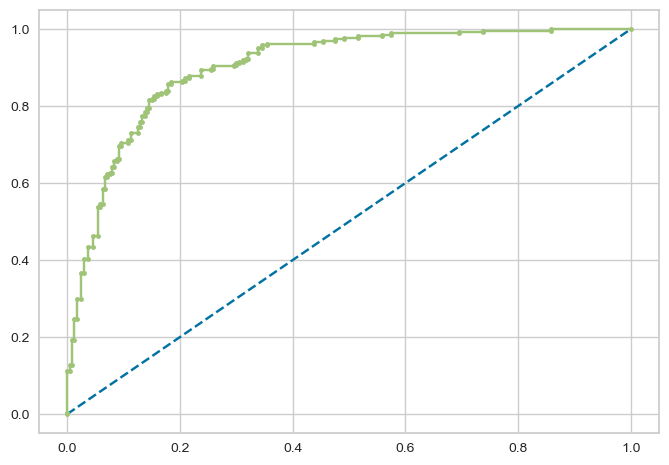

In [7]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [8]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [9]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

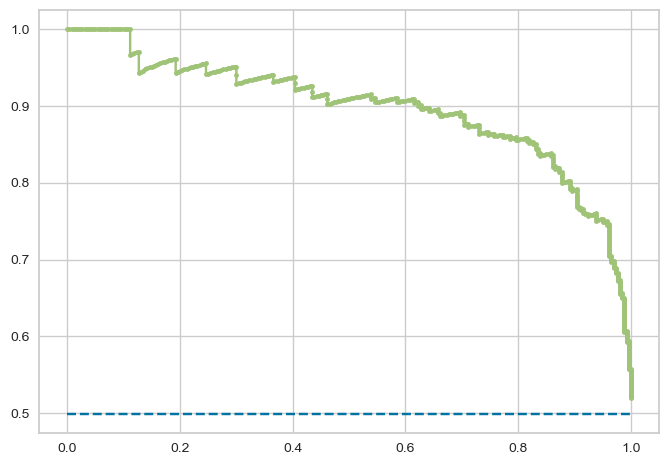

In [10]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [11]:
auc(recall, precision)

0.8977244980325834

In [12]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



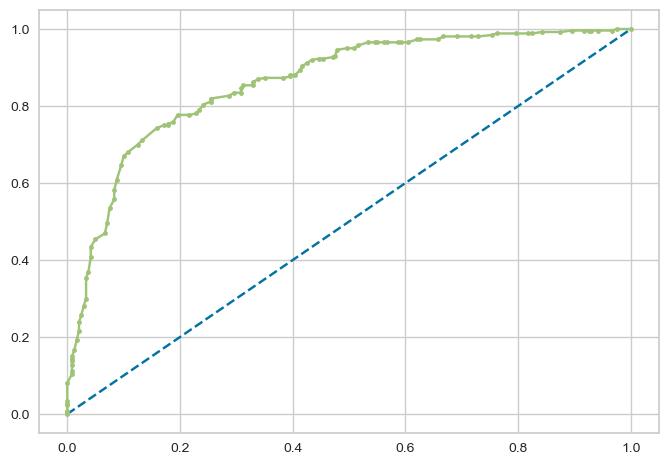

In [13]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [14]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

##### Дизбаланс классов

In [15]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [18]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


In [19]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



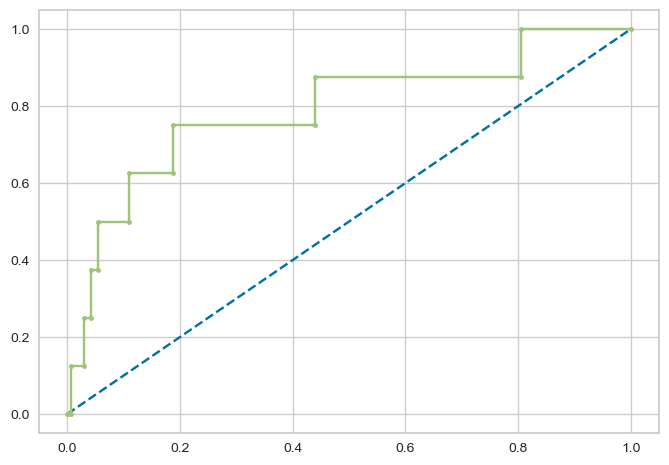

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

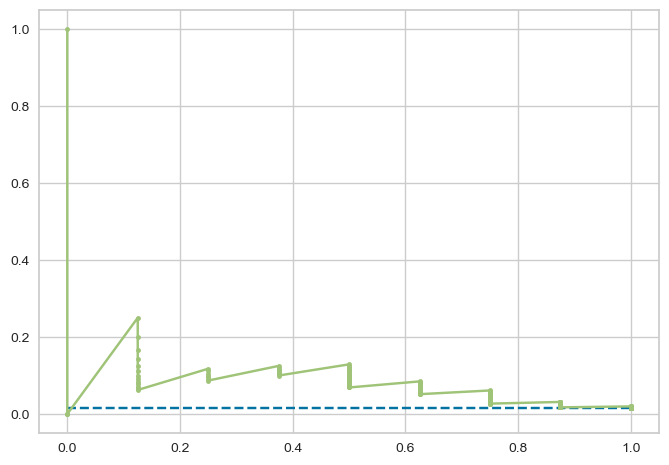

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

##### Выбор значения порога по кривым

In [22]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

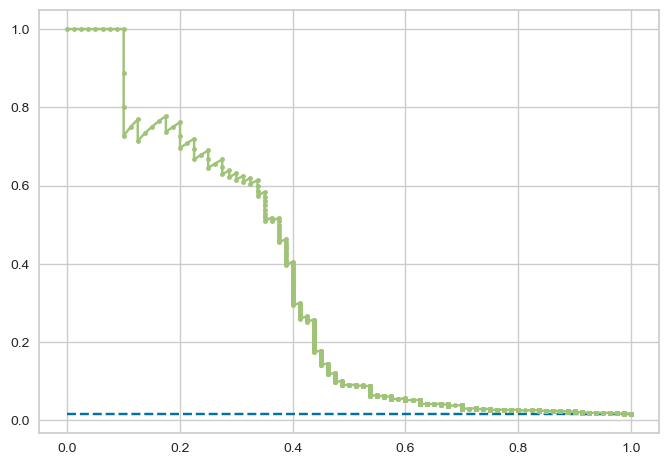

In [23]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [24]:
from numpy import argmax

In [25]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.19396988180996536

In [26]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.193970, F-Score=0.438


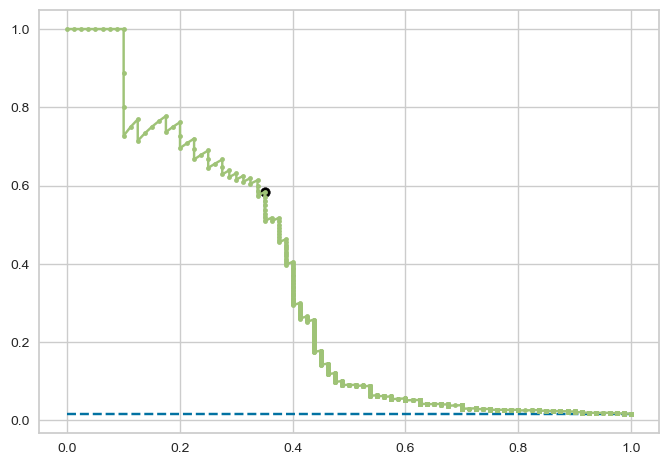

In [27]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [28]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.57      0.34      0.43        80

    accuracy                           0.99      5000
   macro avg       0.78      0.67      0.71      5000
weighted avg       0.98      0.99      0.98      5000



In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.71      0.12      0.21        80

    accuracy                           0.99      5000
   macro avg       0.85      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



# Задания для самостоятельного выполнения

###### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [31]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,n_clusters_per_class=1, n_redundant=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [32]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

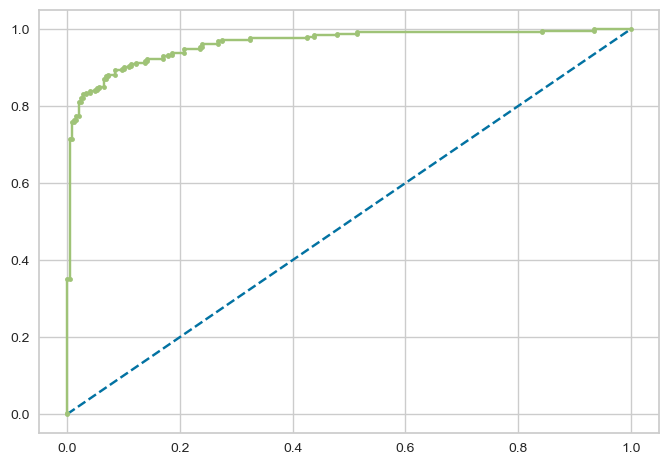

In [34]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [35]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9625386055592005

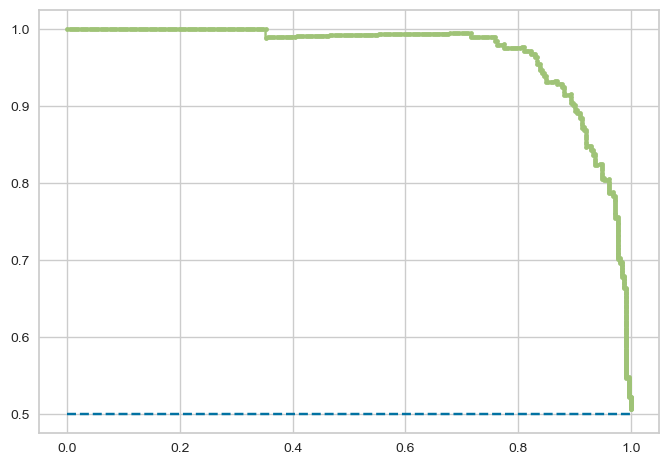

In [36]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [37]:
auc(recall, precision)

0.9686349261696248

In [38]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.93      0.86      0.90       253

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



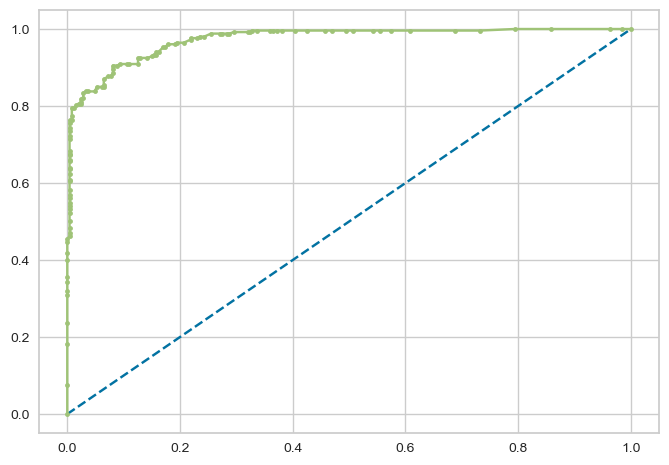

In [39]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [40]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.9730521195052089

##### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [41]:
data = fetch_openml(name='mammography', parser="auto")

In [42]:
X = data.data.iloc[:, 1:]
y = data.target
X

,attr2,attr3,attr4,attr5,attr6
0,5.072578,-0.276061,0.832444,-0.377866,0.480322
1,-0.169390,0.670652,-0.859553,-0.377866,-0.945723
2,-0.443654,5.674705,-0.859553,-0.377866,-0.945723
3,0.131415,-0.456387,-0.859553,-0.377866,-0.945723
4,-0.394994,-0.140816,0.979703,-0.377866,1.013566
...,...,...,...,...,...
11178,-0.377300,-0.321142,1.269157,3.652984,1.092791
11179,-0.417112,-0.366224,0.851010,2.789649,1.345700
11180,1.763724,-0.501468,1.562408,6.489072,0.931294
11181,-0.222474,-0.050653,1.509665,0.539269,1.315229


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

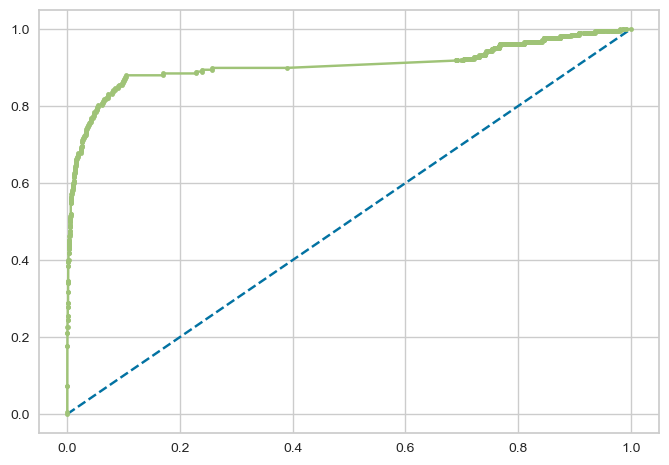

In [44]:
fpr, tpr, _ = roc_curve(np.array(y_test.astype(float)), y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [45]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.905715811965812

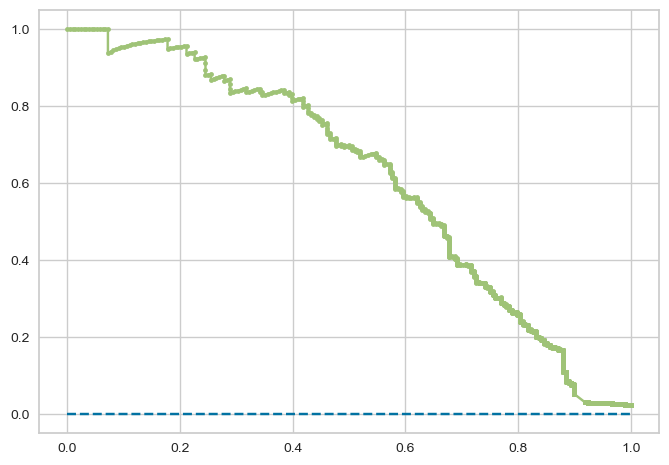

In [46]:
precision, recall, _ = precision_recall_curve(np.array(y_test.astype(float)), y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [47]:
auc(recall, precision)

0.6111944359620022

In [48]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      8739
           1       0.84      0.38      0.52       208

    accuracy                           0.98      8947
   macro avg       0.91      0.69      0.76      8947
weighted avg       0.98      0.98      0.98      8947



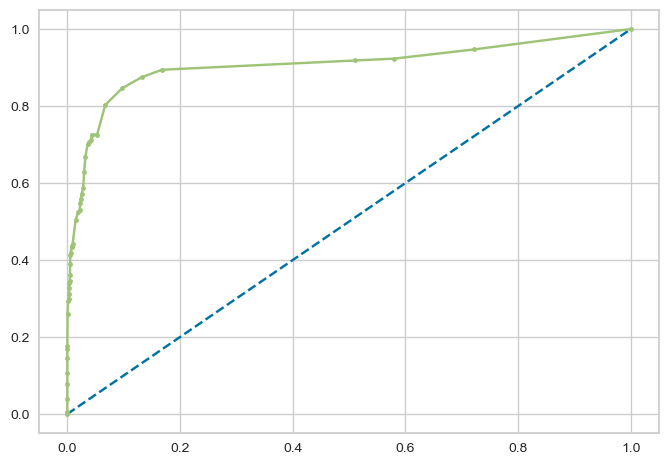

In [49]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, roc_thresholds = roc_curve(np.array(y_test.astype(float)), y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [50]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.9057053592648341

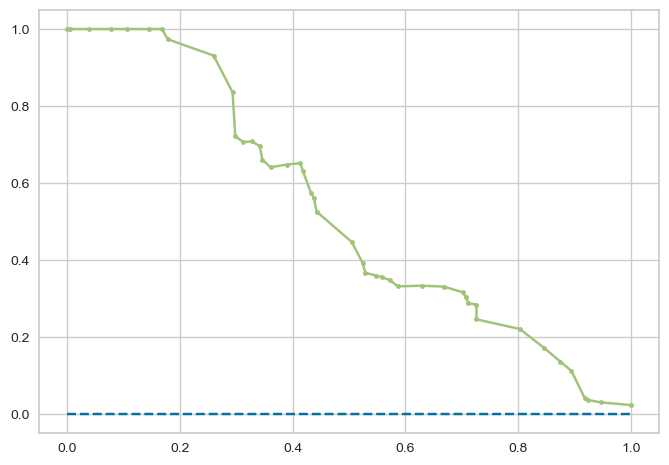

In [51]:
precision, recall, _ = precision_recall_curve(np.array(y_test.astype(float)), y_pred2_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [52]:
auc(recall, precision)

0.5269369420148733

In [53]:
y_test_pred = model2.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      8739
           1       0.00      0.00      0.00       208

    accuracy                           0.98      8947
   macro avg       0.49      0.50      0.49      8947
weighted avg       0.95      0.98      0.97      8947



###### 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации

In [54]:
geom_mean = np.sqrt(tpr * (1 - fpr))
ix = argmax(geom_mean)
roc_thresholds[ix]

0.024

In [55]:
print('Порог=%f, Geom_mean=%.3f' % (roc_thresholds[ix], geom_mean[ix]))

Порог=0.024000, Geom_mean=0.874


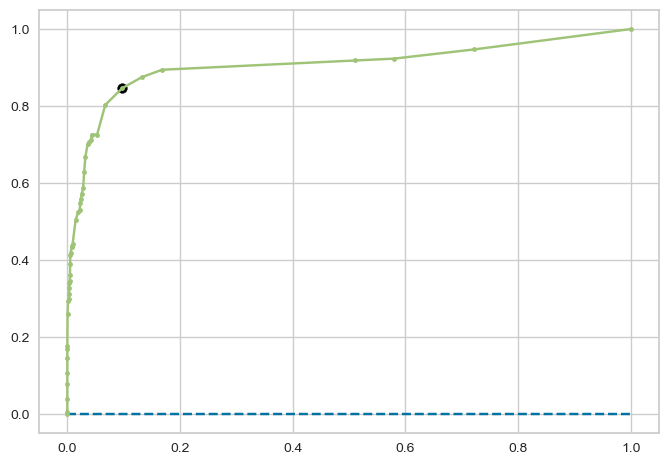

In [56]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black')
plt.show()

In [57]:
y_pred = np.where(y_pred2_proba[:, 1] > roc_thresholds[ix], 1, -1).astype(int)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [58]:
#стало
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.93      0.96      8739
           1       0.22      0.80      0.35       208

    accuracy                           0.93      8947
   macro avg       0.61      0.87      0.65      8947
weighted avg       0.98      0.93      0.95      8947



In [59]:
#было
y_test_pred = model2.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      8739
           1       0.00      0.00      0.00       208

    accuracy                           0.98      8947
   macro avg       0.49      0.50      0.49      8947
weighted avg       0.95      0.98      0.97      8947



###### 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

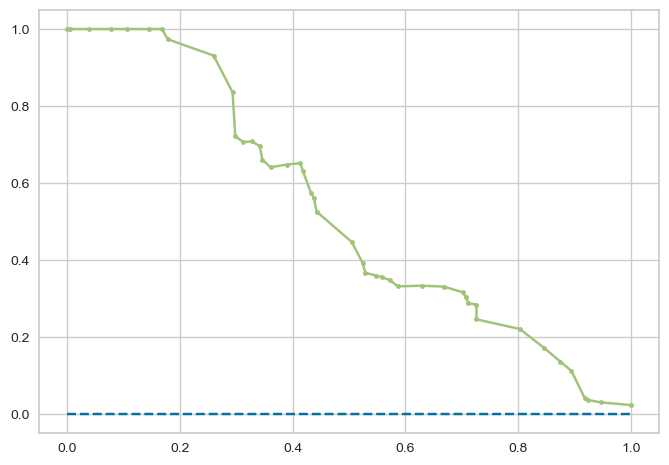

In [60]:
p, r, pr_thresholds = precision_recall_curve(np.array(y_test.astype(float)), y_pred2_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [61]:
auc(r, p)

0.5269369420148733

In [62]:
# С преимуществом для recall
beta = 2
f2_scores = (1 + beta**2) * (p * r) / ((beta**2 * p) + r)
ix = argmax(f2_scores)
pr_thresholds[ix]

0.048

In [63]:
print('Порог=%f, f2_scores=%.3f' % (pr_thresholds[ix], f2_scores[ix]))

Порог=0.048000, f2_scores=0.564


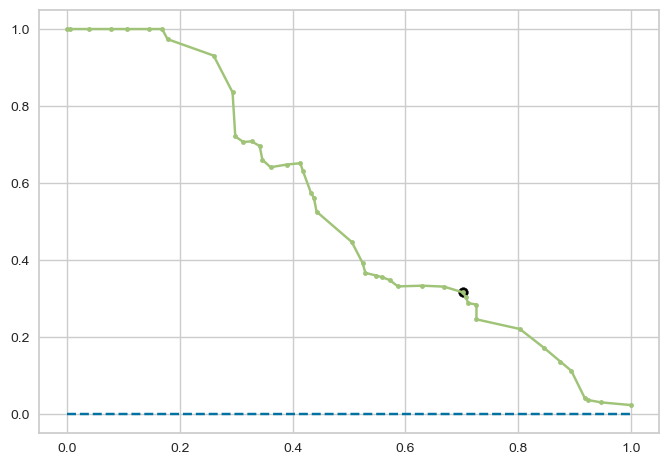

In [64]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [65]:
y_pred = np.where(y_pred2_proba[:, 1] > pr_thresholds[ix], 1, -1).astype(int)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [66]:
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98      8739
           1       0.33      0.67      0.44       208

    accuracy                           0.96      8947
   macro avg       0.66      0.82      0.71      8947
weighted avg       0.98      0.96      0.97      8947



In [67]:
# С преимуществом для presicion
beta = 0.5
f05_scores = (1 + beta**2) * (p * r) / ((beta**2 * p) + r)
ix = argmax(f05_scores)
pr_thresholds[ix]

0.14

In [68]:
print('Порог=%f, f2_scores=%.3f' % (pr_thresholds[ix], f05_scores[ix]))

Порог=0.140000, f2_scores=0.614


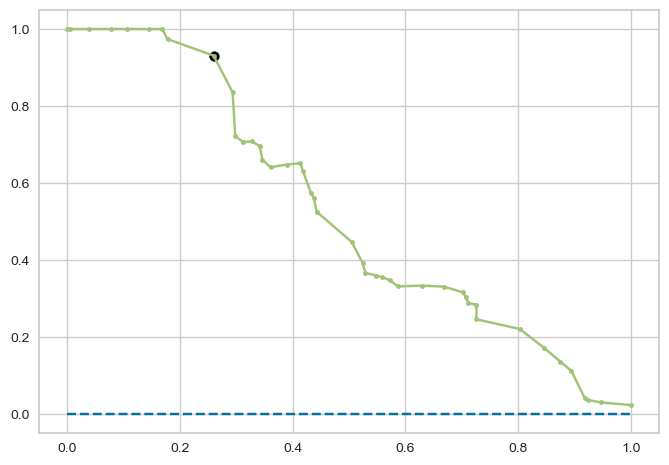

In [72]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show();

In [73]:
y_pred = np.where(y_pred2_proba[:, 1] > pr_thresholds[ix], 1, -1).astype(int)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [74]:
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      8739
           1       0.97      0.18      0.30       208

    accuracy                           0.98      8947
   macro avg       0.98      0.59      0.65      8947
weighted avg       0.98      0.98      0.97      8947



Когда преимущество у recall, то его macro avg выше, чем у precision.
Когда преимущество у precision, то наоборот.
F1-score macro avg выше, когда преимущество у recall. Значит модель реже совершает ложно отрицательные прогнозы, чем ложно положительные. 

###### 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

In [75]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression(random_state=1, multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [76]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

In [77]:
y_pred_proba = model.predict_proba(X_test)

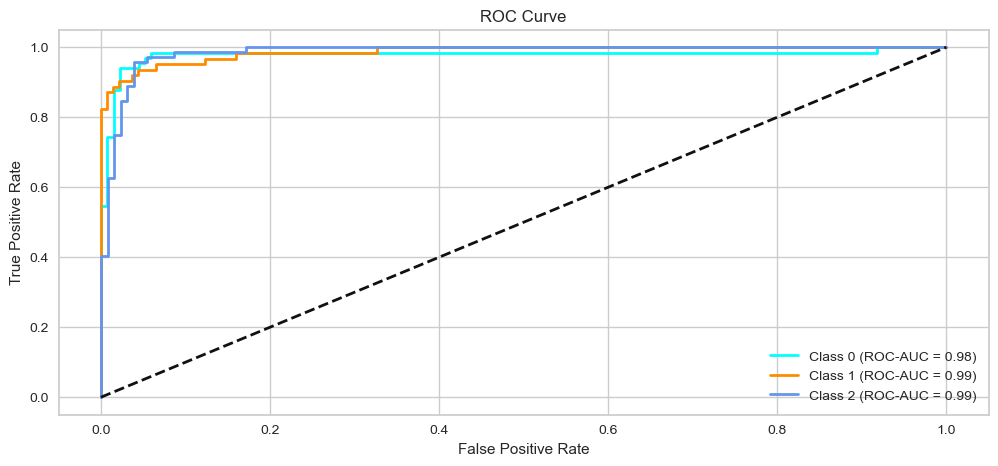

In [78]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i],  y_pred_proba[:, i])
    
plt.figure(figsize=(12, 5))
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

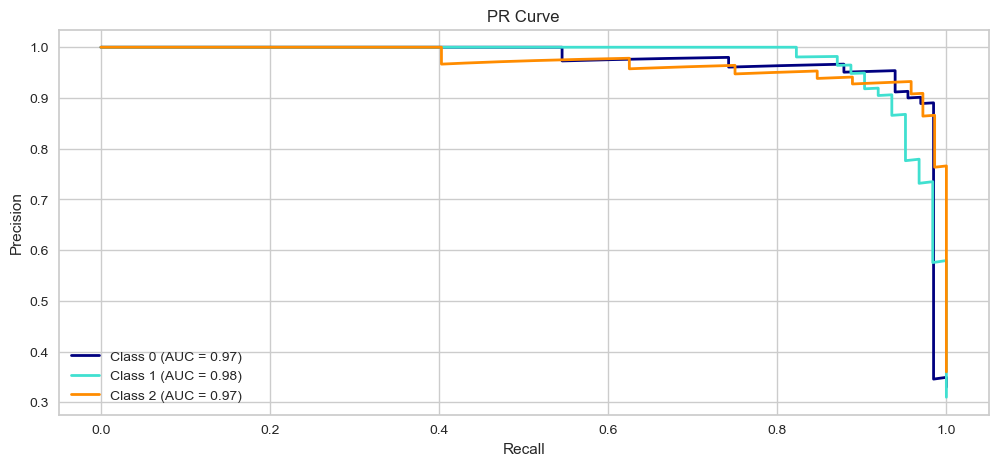

In [79]:
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    
plt.figure(figsize=(12, 5))
colors = cycle(['navy', 'turquoise', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {i} (AUC = {pr_auc[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend();

In [80]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.93      0.92      0.93        62
           2       0.93      0.94      0.94        72

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



###### 6. Используйте для построения кривых библиотеку yellowbrick.

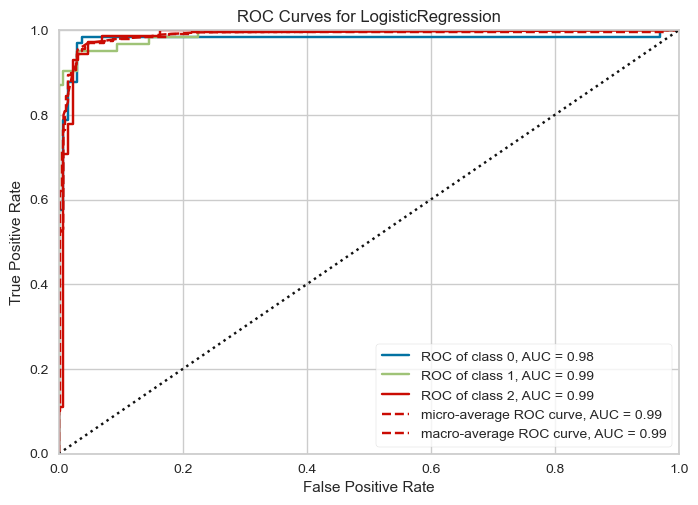

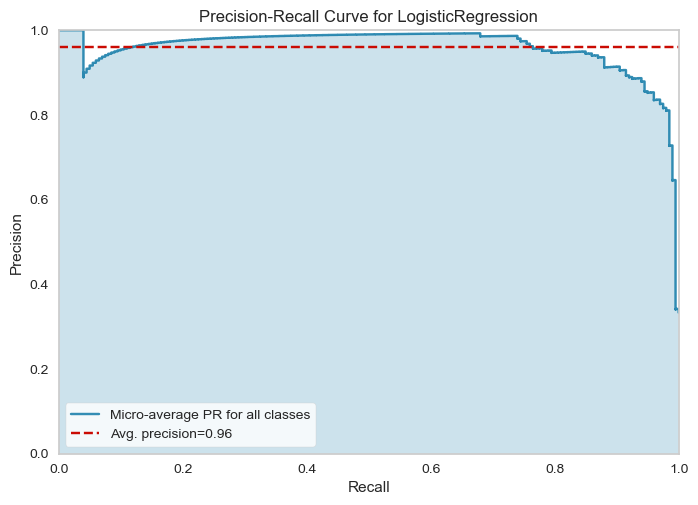

In [81]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

roc_visualizer = ROCAUC(model, classes=np.unique(y))
roc_visualizer.fit(X_train, y_train)
roc_visualizer.score(X_test, y_test)
roc_visualizer.show()

pr_visualizer = PrecisionRecallCurve(model, classes=np.unique(y))
pr_visualizer.fit(X_train, y_train)
pr_visualizer.score(X_test, y_test)
pr_visualizer.show();

# Дополнительные задания

###### 1. На реальном датасете для бинарной классификации используйте кривые для сравнения нескольких видов моделей между собой (изобразите кривые разных моделей на одном графике). Сделайте вывод о том, какая модель будет лучше работать с учетом оптимизации порога.

In [82]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

data = load_breast_cancer()
X = data.data
y = data.target

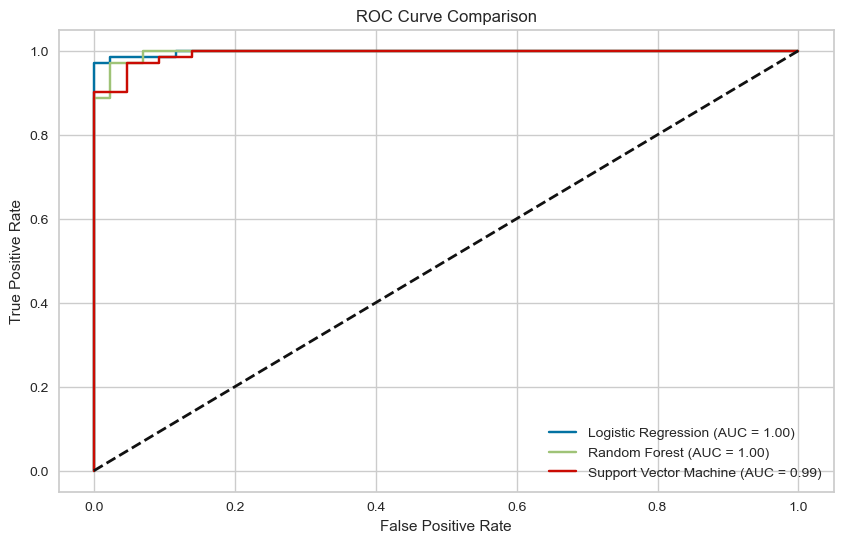

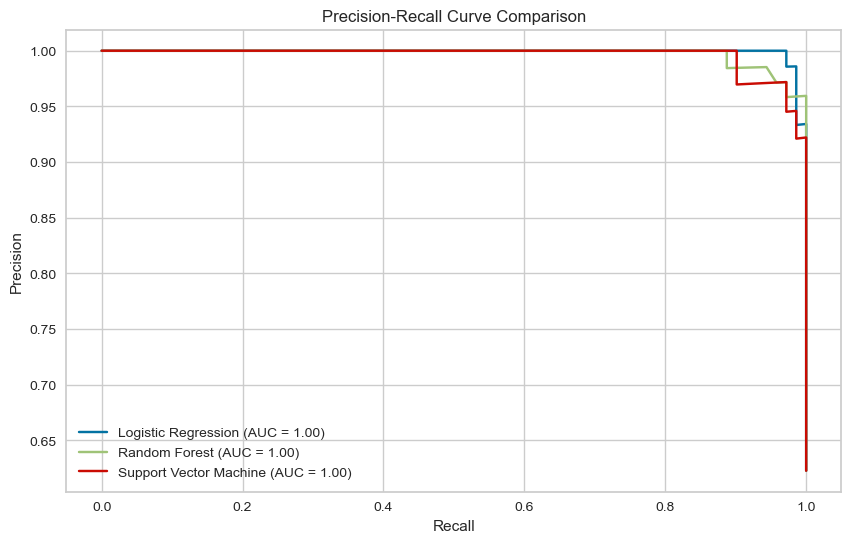

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=f'{name} (AUC = {average_precision_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

###### 2.Повторите предыдущее задание, но для задачи множественной классификации. Выберите два датасета: один с относительно равным распределением классов, а второй - с близким к экспоненциальному, с большим неравенством классов. Продемонтрируйте разницу в поведении моделей на разных кривых.

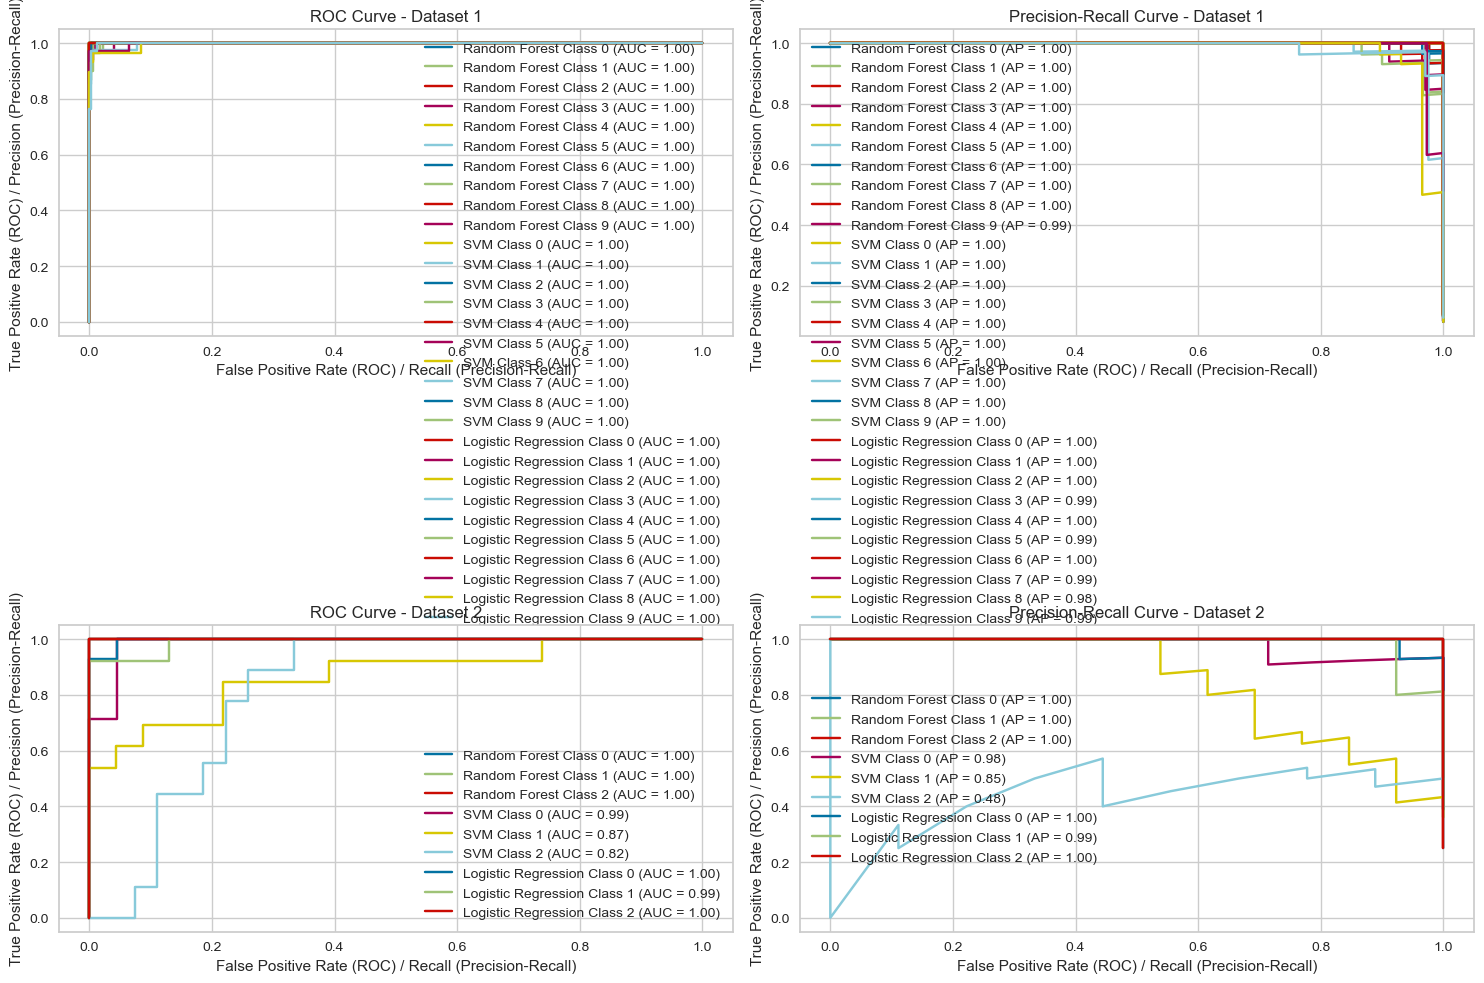

In [84]:
from sklearn.datasets import load_digits, load_wine
from sklearn.multiclass import OneVsRestClassifier

X_digits, y_digits = load_digits(return_X_y=True)
X_wine, y_wine = load_wine(return_X_y=True)

X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.2, random_state=1)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=1)

models = {
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SVM": OneVsRestClassifier(SVC(probability=True)),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(multi_class='ovr', max_iter=10000))
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for dataset_idx, (X_train, X_test, y_train, y_test) in enumerate([(X_train_digits, X_test_digits, y_train_digits, y_test_digits),
                                                                  (X_train_wine, X_test_wine, y_train_wine, y_test_wine)]):
    for curve_idx, (curve_name, curve_func) in enumerate([('ROC', roc_curve), ('Precision-Recall', precision_recall_curve)]):
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_score = model.predict_proba(X_test)

            if curve_name == 'ROC':
                y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
                n_classes = y_test_bin.shape[1]
                for i in range(n_classes):
                    fpr, tpr, _ = curve_func(y_test_bin[:, i], y_score[:, i])
                    roc_auc = auc(fpr, tpr)
                    axes[dataset_idx, curve_idx].plot(fpr, tpr, label=f'{name} Class {i} (AUC = {roc_auc:.2f})')

            elif curve_name == 'Precision-Recall':
                y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
                n_classes = y_test_bin.shape[1]
                for i in range(n_classes):
                    precision, recall, _ = curve_func(y_test_bin[:, i], y_score[:, i])
                    pr_auc = average_precision_score(y_test_bin[:, i], y_score[:, i])
                    axes[dataset_idx, curve_idx].plot(recall, precision, label=f'{name} Class {i} (AP = {pr_auc:.2f})')

        axes[dataset_idx, curve_idx].set_title(f'{curve_name} Curve - Dataset {dataset_idx + 1}')
        axes[dataset_idx, curve_idx].set_xlabel('False Positive Rate (ROC) / Recall (Precision-Recall)')
        axes[dataset_idx, curve_idx].set_ylabel('True Positive Rate (ROC) / Precision (Precision-Recall)')
        axes[dataset_idx, curve_idx].legend()

plt.tight_layout()
plt.show()